In [3]:
import csv
import os
import pandas as pd
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB


# Predictiong Graph in 2012

* Load training and testing dataframes

In [4]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2012/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2012/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.146,0.073,86.999,18.170,5.470,1.102,0.917,0.069,4.376,4.376,1.834,630.500
1,0.823,0.412,138.366,31.052,2.229,1.752,0.981,0.028,9.196,9.196,1.962,791.000
2,0.276,0.138,97.778,21.225,4.019,1.238,0.946,0.051,5.761,5.761,1.893,684.000
3,0.183,0.092,104.485,23.518,3.761,1.323,0.979,0.048,6.813,6.813,1.957,752.000
4,0.289,0.144,111.130,25.164,3.197,1.407,0.977,0.040,7.530,7.530,1.954,752.000


* define evaluation function

In [5]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "f1_score"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [6]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

In [ ]:
#Sweet spot
accuracy = []
precition = []
recall= []
f1 = []
for i in range(20,200,5):
    print(i)
    classifier = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0, criterion="entropy", 
                                        max_samples=i)
    classifier.fit(X_train, Y_train)
    prediction = classifier.predict(X_test)
    accuracy.append(accuracy_score(prediction, Y_test))
    precition.append(precision_score(prediction, Y_test))
    recall.append(recall_score(prediction, Y_test))
    f1.append(f1_score(prediction, Y_test))
y = range(2,1000)

df = pd.DataFrame({"acc":accuracy, "pre":precition, "rec":recall, "f1":f1})
ax = df.plot(kind="scatter", x=y,y="acc", color="b", label="acuuracy")
df.plot( y="pre",x=y, color="g", label="precision", ax=ax)
df.plot( y="rec",x=y, color="orange", label="recall", ax=ax)
df.plot( y="f1",x=y, color="purple", label="f1", ax=ax)
                            


* choose a ML algorithm

In [7]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=0, criterion="entropy", 
                                    max_samples=20)

* Training

In [8]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, max_samples=20,
                       random_state=0)

* Make a predict

In [9]:
prediction = classifier.predict(X_test)

In [10]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.865
1,Precision,0.858
2,Recall,0.645
3,f1_score,0.737


In [ ]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2013

* Load training and testing dataframes

In [11]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2013/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2013/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.261,0.112,126.489,26.017,1.972,1.914,0.971,0.030,6.640,6.640,1.943,919.000
1,0.133,0.057,98.146,19.514,2.603,1.485,0.946,0.039,4.508,4.508,1.892,806.500
2,0.568,0.245,181.191,38.571,2.742,1.539,0.986,0.023,10.908,10.908,1.972,1041.000
3,0.495,0.213,186.309,38.862,2.820,1.516,0.986,0.023,10.417,10.417,1.972,1021.000
4,0.349,0.150,133.047,28.383,2.014,1.928,0.985,0.029,7.848,7.848,1.970,965.000


In [12]:
X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.261,0.112,126.489,26.017,1.972,1.914,0.971,0.030,6.640,6.640,1.943,919.000
1,0.133,0.057,98.146,19.514,2.603,1.485,0.946,0.039,4.508,4.508,1.892,806.500
2,0.568,0.245,181.191,38.571,2.742,1.539,0.986,0.023,10.908,10.908,1.972,1041.000
3,0.495,0.213,186.309,38.862,2.820,1.516,0.986,0.023,10.417,10.417,1.972,1021.000
4,0.349,0.150,133.047,28.383,2.014,1.928,0.985,0.029,7.848,7.848,1.970,965.000


* define evaluation function

In [13]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   f1_score(actual,predictions)]
    })

* Find important features

In [14]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [15]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [16]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [17]:
prediction = classifier.predict(X_test)

In [18]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.901
1,Precision,0.856
2,Recall,0.725
3,F1,0.785


In [ ]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'deg_e1', 'deg_e2']
feature_importance(columns, classifier)

# Predictiong Graph in 2014

* Load training and testing dataframes

In [19]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2014/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2014/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2.055,0.795,354.210,73.133,2.021,1.935,0.989,0.011,21.905,21.905,1.977,1346.000
1,0.402,0.156,213.568,40.818,4.797,1.219,0.972,0.027,9.233,9.233,1.944,1119.000
2,0.769,0.298,258.801,52.339,2.999,1.477,0.990,0.017,14.242,14.242,1.979,1254.000
3,1.488,0.576,311.152,64.178,2.235,1.776,0.989,0.013,19.062,19.062,1.979,1323.000
4,1.459,0.564,313.899,63.904,2.211,1.791,0.990,0.013,17.976,17.976,1.979,1296.000


In [ ]:
X_test.head()

* define evaluation function

In [20]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [21]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [22]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [23]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [24]:
prediction = classifier.predict(X_test)

In [25]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.872
1,Precision,0.918
2,Recall,0.636
3,F1,0.752


'Feature Importance'

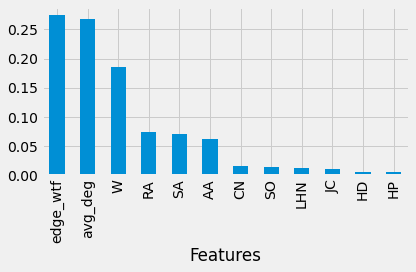

In [27]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2015

* Load training and testing dataframes

In [28]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2015/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2015/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.602,0.215,272.158,51.993,2.423,1.668,0.988,0.015,12.558,12.558,1.976,1550.000
1,0.115,0.041,146.026,26.939,3.934,1.300,0.977,0.035,5.520,5.520,1.954,1345.000
2,0.579,0.206,254.580,47.676,2.267,1.750,0.988,0.016,10.541,10.541,1.975,1508.500
3,0.102,0.036,127.471,22.694,6.169,1.135,0.959,0.055,4.210,4.210,1.917,1131.000
4,0.756,0.269,219.157,41.219,2.014,1.951,0.991,0.018,9.612,9.612,1.982,1371.500


In [ ]:
X_test.head()

* define evaluation function

In [29]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [30]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [31]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [32]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [33]:
prediction = classifier.predict(X_test)

In [34]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.880
1,Precision,0.806
2,Recall,0.736
3,F1,0.770


'Feature Importance'

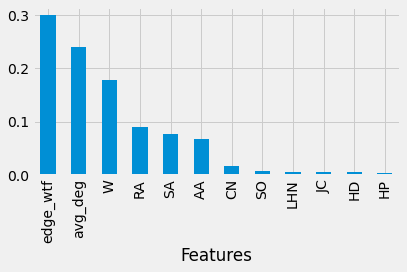

In [35]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2016

* Load training and testing dataframes

In [36]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2016/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2016/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.050,0.017,142.322,25.085,18.882,0.939,0.894,0.125,4.230,4.230,1.789,1340.500
1,0.049,0.016,145.239,25.892,16.675,0.958,0.906,0.110,4.556,4.556,1.812,1362.500
2,0.834,0.278,311.494,62.516,2.055,1.924,0.994,0.013,17.397,17.397,1.987,1922.500
3,1.107,0.369,369.029,73.912,2.435,1.678,0.993,0.011,20.926,20.926,1.986,1996.500
4,0.022,0.007,137.265,23.904,33.210,0.906,0.882,0.219,3.828,3.828,1.763,1317.000


In [ ]:
X_test.head()

* define evaluation function

In [37]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [38]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [39]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [40]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [41]:
prediction = classifier.predict(X_test)

In [42]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.871
1,Precision,0.924
2,Recall,0.650
3,F1,0.763


'Feature Importance'

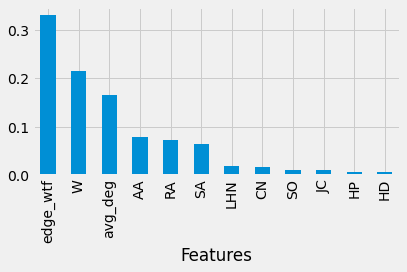

In [43]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2017

* Load training and testing dataframes

In [44]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2017/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2017/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1.015,0.320,363.698,72.323,2.088,1.898,0.994,0.011,20.786,20.786,1.989,2480.000
1,1.242,0.392,406.440,80.104,2.334,1.730,0.993,0.010,22.902,22.902,1.987,2512.000
2,0.026,0.008,170.921,31.077,29.306,0.981,0.950,0.168,6.384,6.384,1.899,1928.000
3,1.262,0.398,410.395,80.841,2.356,1.718,0.993,0.010,23.039,23.039,1.987,2512.000
4,0.419,0.132,244.344,48.587,3.412,1.403,0.994,0.020,13.912,13.912,1.988,2359.500


In [ ]:
X_test.head()

* define evaluation function

In [45]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual,predictions)]
    })

* Find important features

In [46]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [47]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [48]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [49]:
prediction = classifier.predict(X_test)

In [50]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.892
1,Precision,0.875
2,Recall,0.796
3,F1,0.834


'Feature Importance'

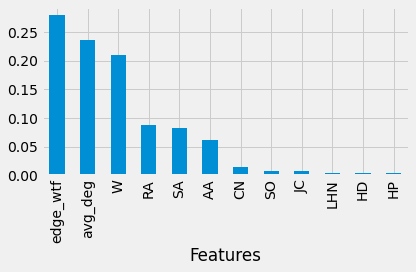

In [51]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)


# Predictiong Graph in 2018

* Load training and testing dataframes

In [52]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2018/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2018/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,0.058,0.018,105.153,21.641,3.553,1.376,0.992,0.046,6.538,6.538,1.984,2344.000
1,0.042,0.013,109.052,21.379,3.215,1.427,0.988,0.042,5.687,5.687,1.977,2203.500
2,0.054,0.016,85.135,15.398,6.019,1.114,0.940,0.079,2.998,2.998,1.880,1856.000
3,0.021,0.006,82.304,15.355,8.769,1.077,0.959,0.115,3.283,3.283,1.918,1947.500
4,0.089,0.027,148.225,29.546,2.042,1.940,0.995,0.027,8.200,8.200,1.989,2404.000


In [ ]:
X_test.head()

* define evaluation function

In [53]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall","F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [54]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [55]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [56]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [57]:
prediction = classifier.predict(X_test)

In [58]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.883
1,Precision,0.716
2,Recall,0.835
3,F1,0.771


In [ ]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'deg_avg']
feature_importance(columns, classifier)


# Predictiong Graph in 2019

* Load training and testing dataframes

In [97]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2019/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/Most_recent_graphs_Prediction/2019/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,edge_wtf,W,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1.588,0.459,706.951,108.856,2.000,1.981,0.995,0.006,16.839,16.839,1.990,2611.000
1,1.659,0.480,746.657,115.387,2.112,1.882,0.995,0.005,18.203,18.203,1.991,2637.000
2,1.416,0.409,668.557,101.069,2.097,1.891,0.994,0.006,14.342,14.342,1.989,2525.000
3,1.499,0.433,692.171,105.704,2.023,1.958,0.995,0.006,15.713,15.713,1.990,2564.000
4,1.559,0.451,705.663,107.847,1.996,1.984,0.995,0.006,16.190,16.190,1.990,2588.500


In [98]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1 
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  1271167
Negative_samples:  4114336


### upsample minority class

In [112]:
# Separate majority and minority classes
df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6171504,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,2:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [113]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)): 
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [114]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm 

### 1. Random Forest

In [115]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, criterion="entropy")

### 2. SVM

In [ ]:
classifier = SVC(kernel='linear', class_weight='balanced', probability=True)

### 3. MLP

In [102]:
classifier = MLPClassifier(random_state=1, max_iter=300, activation='tanh', learning_rate='adaptive')

### 4. Naive Bayes

In [ ]:
#classifier = GaussianNB()
classifier = ComplementNB()
#classifier = MultinomialNB()
#classifier = BernoulliNB()

### Train and predict

In [116]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [117]:
prediction = classifier.predict(X_test)

In [118]:
np.unique(prediction)

array([0, 1])

In [119]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.824
1,Precision,0.946
2,Recall,0.640
3,FPR,0.029
4,FNR,0.360
5,F1,0.763


'Feature Importance'

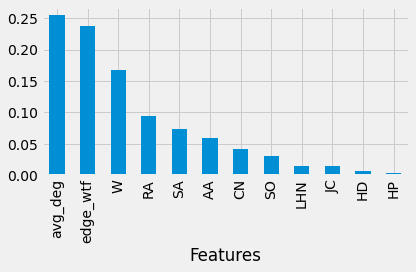

In [120]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

